![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np

In [2]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [12]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [7]:
# Visualización datos de test
dataTraining.iloc[0,0]

34995

In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

### CODIGO GEIBER:

In [3]:
from pycaret.regression import *

df = dataTraining
dataTraining.State.unique().size

51

In [4]:
#config = setup(data = df, target = 'Price', high_cardinality_features = ['Model','State','Make'], silent=True, session_id=123) 
config = setup(data = df, target = 'Price', feature_selection = True, high_cardinality_features = ['Model','State','Make'], silent=True, session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(400000, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(279999, 4)"


In [6]:
#best = compare_models( turbo = True, verbose=True)

In [ ]:
best = compare_models(cross_validation=False)

In [5]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2549.7388,14749760.0000,3840.5417,0.8740,0.1697,0.1292
1,2584.7632,15250160.0000,3905.1453,0.8667,0.1723,0.1312
2,2574.1104,14887038.0000,3858.3726,0.8715,0.1723,0.1315
3,2561.9045,14658105.0000,3828.5906,0.8730,0.1717,0.1307
4,2602.4111,15275463.0000,3908.3838,0.8679,0.1737,0.1327
5,2584.1680,14724712.0000,3837.2793,0.8728,0.1707,0.1311
6,2550.5386,14452109.0000,3801.5930,0.8763,0.1706,0.1293
7,2582.0552,15107613.0000,3886.8513,0.8693,0.1740,0.1320
8,2577.8040,14832875.0000,3851.3472,0.8721,0.1716,0.1308
9,2551.3347,14656985.0000,3828.4441,0.8728,0.1698,0.1298


In [6]:
tuned_xgboost = tune_model(xgboost, choose_better=True, optimize="MSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2405.0435,13717633.0000,3703.7324,0.8828,0.1589,0.1193
1,2419.5750,14018281.0000,3744.0996,0.8775,0.1613,0.1209
2,2405.2214,13608553.0000,3688.9773,0.8825,0.1597,0.1205
3,2415.5933,13617920.0000,3690.2466,0.8820,0.1616,0.1213
4,2434.7456,14107967.0000,3756.0574,0.8780,0.1620,0.1213
5,2403.9221,13387064.0000,3658.8337,0.8843,0.1593,0.1201
6,2396.9377,13395100.0000,3659.9316,0.8854,0.1589,0.1194
7,2415.6445,13968488.0000,3737.4441,0.8792,0.1619,0.1210
8,2385.7837,13412916.0000,3662.3647,0.8843,0.1587,0.1190
9,2383.5886,13443311.0000,3666.5122,0.8833,0.1588,0.1192


In [ ]:
rf = create_model('rf')

In [12]:
predict_model(tuned_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2362.1553,13262006.0000,3641.7036,0.8850,0.1582,0.1184


,Year,Mileage,State,Make,Model,Price,Label
0,2015.0,34819.0,5737.0,23311.0,1666.0,22481.0,21725.324219
1,2004.0,117971.0,12729.0,209.0,8629.0,5995.0,5748.191895
2,2017.0,23451.0,12488.0,40868.0,2586.0,17748.0,17495.224609
3,2017.0,27972.0,12729.0,40868.0,1600.0,14600.0,14990.208984
4,2013.0,85923.0,7689.0,17030.0,4054.0,29999.0,27423.308594
...,...,...,...,...,...,...,...
119996,2017.0,21043.0,3442.0,6369.0,608.0,26500.0,25615.804688
119997,2014.0,70475.0,32097.0,44130.0,1894.0,13944.0,14153.490234
119998,2014.0,35513.0,12488.0,17030.0,4054.0,33995.0,32755.722656
119999,2017.0,13444.0,25572.0,23311.0,160.0,21895.0,22645.195312


In [19]:
Gridtuned_xgboost = tune_model(xgboost, search_library='tune-sklearn', search_algorithm='hyperopt', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2417.8259,13799241.0000,3714.7329,0.8821,0.1627,0.1209
1,2440.1206,14024926.0000,3744.9868,0.8774,0.1635,0.1225
2,2432.4263,13611890.0000,3689.4294,0.8825,0.1625,0.1229
3,2433.9766,13641948.0000,3693.5007,0.8818,0.1634,0.1229
4,2444.1243,14105953.0000,3755.7893,0.8780,0.1653,0.1226
5,2430.6682,13392231.0000,3659.5398,0.8843,0.1629,0.1227
6,2418.5085,13333634.0000,3651.5249,0.8859,0.1617,0.1214
7,2434.7280,13998612.0000,3741.4719,0.8789,0.1641,0.1226
8,2398.7053,13414765.0000,3662.6172,0.8843,0.1606,0.1204
9,2441.1980,13717171.0000,3703.6699,0.8809,0.1628,0.1230


In [20]:
oputnatuned_xgboost = tune_model(xgboost, search_library='tune-sklearn', search_algorithm='optuna', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5007.0894,56372692.0000,7508.1748,0.5185,0.2963,0.2130
1,4982.5166,54745108.0000,7398.9937,0.5215,0.2949,0.2131
2,4995.9326,55071208.0000,7420.9976,0.5246,0.2951,0.2134
3,4991.3950,54999088.0000,7416.1372,0.5233,0.2956,0.2142
4,5017.5039,55652100.0000,7460.0337,0.5188,0.2963,0.2139
5,4972.4937,54694756.0000,7395.5903,0.5275,0.2941,0.2128
6,5051.0024,56365780.0000,7507.7148,0.5176,0.2975,0.2141
7,5028.2925,55607220.0000,7457.0249,0.5190,0.2980,0.2153
8,5012.4673,55561308.0000,7453.9458,0.5209,0.2954,0.2137
9,5010.2583,55408720.0000,7443.7036,0.5191,0.2960,0.2144


In [21]:
grid2Ttuned_xgboost = tune_model(xgboost, search_library='tune-sklearn', search_algorithm='grid', choose_better=True, optimize="MSE")

Trials did not complete: [_Trainable_7ee36_01103, _Trainable_7ee36_01105, _Trainable_7ee36_01106, _Trainable_7ee36_01107, _Trainable_7ee36_01108, _Trainable_7ee36_01109, _Trainable_7ee36_01110, _Trainable_7ee36_01111, _Trainable_7ee36_01112, _Trainable_7ee36_01113, _Trainable_7ee36_01114, _Trainable_7ee36_01115, _Trainable_7ee36_01116, _Trainable_7ee36_01117, _Trainable_7ee36_01118, _Trainable_7ee36_01119, _Trainable_7ee36_01120, _Trainable_7ee36_01121, _Trainable_7ee36_01122, _Trainable_7ee36_01123, _Trainable_7ee36_01124, _Trainable_7ee36_01125, _Trainable_7ee36_01126, _Trainable_7ee36_01127, _Trainable_7ee36_01128, _Trainable_7ee36_01129, _Trainable_7ee36_01130, _Trainable_7ee36_01131]
Experiment has been interrupted, but the most recent state was saved. You can continue running this experiment by passing `resume=True` to `tune.run()`


### PASOS FINALES GUARDAR EL MODELO Y PREDICCION DE TEST

In [7]:
modelo = tuned_xgboost

In [8]:
predict_model(modelo)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2392.9033,13621070.0000,3690.6731,0.8819,0.1598,0.1196


,Model,Mileage,Make,Year,Price,Label
0,1666.0,34819.0,23311.0,2015.0,22481.0,21793.662109
1,8629.0,117971.0,209.0,2004.0,5995.0,6037.169922
2,2586.0,23451.0,40868.0,2017.0,17748.0,17857.347656
3,1600.0,27972.0,40868.0,2017.0,14600.0,15721.688477
4,4054.0,85923.0,17030.0,2013.0,29999.0,26332.949219
...,...,...,...,...,...,...
119996,608.0,21043.0,6369.0,2017.0,26500.0,25855.529297
119997,1894.0,70475.0,44130.0,2014.0,13944.0,14730.149414
119998,4054.0,35513.0,17030.0,2014.0,33995.0,32849.945312
119999,160.0,13444.0,23311.0,2017.0,21895.0,21933.623047


In [18]:
final_modelo = finalize_model(modelo)

In [19]:
save_model(final_modelo,'Modelo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=7, min_child_weight=3,
                               missing=nan, monotone_constraints='()',
                               n_estimators=290, n_jobs=-1, num_parallel_tree=1,


In [9]:
unseen = dataTesting
unseen.columns

Index(['Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [34]:
predictions = predict_model(final_modelo, data = unseen)

In [ ]:
predictions.head(2)

In [36]:
predictions['ID'] = predictions.index 
sub = pd.DataFrame({
        "ID": predictions['ID'],
        "Price": predictions['Label']
    })

sub.to_csv('./submission.csv', index=False)

## ----------------------------------------

### REVISION CON EXTRA TREE PARA FEATURE  SELECTION

In [143]:
# feature seleccion
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

y = dataTraining['Price']
X = dataTraining.drop('Price', axis = 1)






In [144]:
oe = OrdinalEncoder()
state_enc=oe.fit_transform(X[["State"]])
make_enc=oe.fit_transform(X[["Make"]])
model_enc=oe.fit_transform(X[["Model"]])
X['State'] = state_enc
X['Make'] = make_enc
X['Model'] = model_enc

#X[X.model_enc == 264]
#X2 = X[X.columns[~X.columns.isin(['model_enc', 'State'])]]
X

,Year,Mileage,State,Make,Model
0,2017,9913,9.0,17.0,489.0
1,2015,20578,35.0,6.0,448.0
2,2012,83716,43.0,2.0,499.0
3,2014,28729,35.0,5.0,398.0
4,2013,64032,5.0,17.0,489.0
...,...,...,...,...,...
399995,2015,25287,43.0,20.0,377.0
399996,2015,17677,22.0,6.0,158.0
399997,2014,66688,27.0,4.0,154.0
399998,2014,37872,15.0,36.0,264.0


In [179]:


# Building the model
extra_tree_forest = ExtraTreesRegressor(n_estimators = 20,
                                        criterion ='mse', max_features = 'auto')
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)



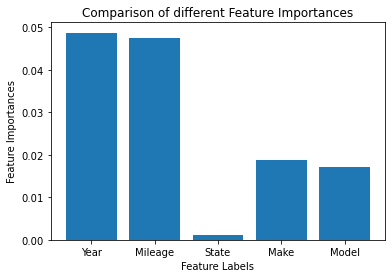

In [178]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [114]:
from sklearn.preprocessing import OrdinalEncoder

transformer = make_column_transformer(
    (OrdinalEncoder(),['species', 'island']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=df.columns
)

transformed_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,Male
1,0.0,2.0,39.5,17.4,186.0,3800.0,Female
2,0.0,2.0,40.3,18.0,195.0,3250.0,Female
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,46.8,14.3,215.0,4850.0,Female
341,2.0,0.0,50.4,15.7,222.0,5750.0,Male
342,2.0,0.0,45.2,14.8,212.0,5200.0,Female


In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = load_dataset('penguins')

transformer = make_column_transformer(
    (OneHotEncoder(), ['species']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

transformed_df

,onehotencoder__x0_Adelie,onehotencoder__x0_Chinstrap,onehotencoder__x0_Gentoo,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.0,0.0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1.0,0.0,0.0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,1.0,0.0,0.0,Torgersen,40.3,18.0,195.0,3250.0,Female
3,1.0,0.0,0.0,Torgersen,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...,...
339,0.0,0.0,1.0,Biscoe,NaN,NaN,NaN,NaN,NaN
340,0.0,0.0,1.0,Biscoe,46.8,14.3,215.0,4850.0,Female
341,0.0,0.0,1.0,Biscoe,50.4,15.7,222.0,5750.0,Male
342,0.0,0.0,1.0,Biscoe,45.2,14.8,212.0,5200.0,Female


In [80]:
df = load_dataset('penguins')
X_toy = df[["species"]]
X_toy

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [109]:
oe = OrdinalEncoder()
#class_attendance_levels = ["Poor", "Average", "Good", "Excellent"]
#oe = OrdinalEncoder(categories=[class_attendance_levels], dtype=int)
ca_transformed=oe.fit_transform(df[["species"]])
#ca_transformed = oe.transform(df[["species"]])
df2 = pd.DataFrame(
    data=ca_transformed, columns=["species_enc"], index=X_toy.index
)
print(oe.categories_)
pd.concat([X_toy, df2], axis=1).head(500)

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)]


,species,species_enc
0,Adelie,0.0
1,Adelie,0.0
2,Adelie,0.0
3,Adelie,0.0
4,Adelie,0.0
...,...,...
339,Gentoo,2.0
340,Gentoo,2.0
341,Gentoo,2.0
342,Gentoo,2.0


In [100]:
df['var1'] = ca_transformed
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,var1
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2.0
